In [2]:
!python -m venv venv
!venv\Scripts\activate

Error: Command '['/content/venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: venvScriptsactivate: command not found


In [3]:

pip install pandas numpy matplotlib plotly statsmodels scikit-learn streamlit openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm


In [24]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Sample - Superstore.csv', low_memory=False, encoding='latin1')

# Preview first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Check the Columns and Data Types


In [5]:
print(df.columns.tolist())
print(df.info())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region      

In [6]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Check updated columns
print(df.columns.tolist())


['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


Handling Missing Values and Duplicates

In [7]:
# Drop exact duplicates
df = df.drop_duplicates()

# Check missing values
print(df.isnull().sum())

# Optional: fill or drop nulls in key numeric columns
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')


row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


In [8]:
# Save the cleaned dataset to CSV
df.to_csv("processed_sales_data.csv", index=False)

# Download it to your system
from google.colab import files
files.download("processed_sales_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating Profit Margin

In [9]:
df['profit_margin'] = df['profit'] / df['sales'].replace({0: pd.NA})


Overall KPIs

In [10]:
# Total Sales, Total Profit, Profit Margin, Average Order Value
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
profit_margin = total_profit / total_sales
aov = df.groupby('order_id')['sales'].sum().mean()  # Average order value

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin:.2%}")
print(f"Average Order Value (AOV): ${aov:,.2f}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Profit Margin: 12.47%
Average Order Value (AOV): $458.61


Montly Sales Trend

/tmp/ipython-input-4261241761.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('order_date').resample('M')['sales'].sum().reset_index()


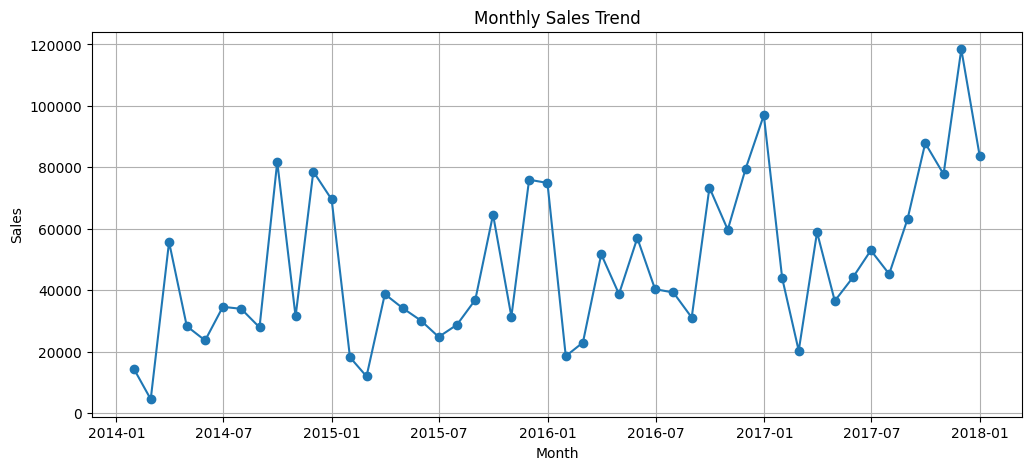

In [11]:
# Aggregate monthly sales
monthly_sales = df.set_index('order_date').resample('M')['sales'].sum().reset_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Top Products by Sales and Profit

In [12]:
# Top 10 products by sales
top_products_sales = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:\n", top_products_sales)

# Top 10 products by profit
top_products_profit = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Profit:\n", top_products_profit)


Top 10 Products by Sales:
 product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: sales, dtype: float64

Top 10 Products by Profit:
 product_name


Sales by Region

In [13]:
top_regions = df.groupby('region')['sales'].sum().sort_values(ascending=False)
print("\nSales by Region:\n", top_regions)



Sales by Region:
 region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64


Discount vs Profit Analysis.

In [14]:
import plotly.express as px

fig = px.scatter(df, x='discount', y='profit', hover_data=['product_name'], title='Discount vs Profit')
fig.show()


Customer Analysis (RFM Segmentation)

In [15]:
# Snapshot date
snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)


Calculate RFM Metrics

Recency: Days since last purchase


Frequency: Number of orders

Monetary: Total sales amount






In [16]:
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'sales': 'sum'
}).rename(columns={
    'order_date': 'recency',
    'order_id': 'frequency',
    'sales': 'monetary'
})

rfm.head()


,recency,frequency,monetary
customer_id,,,
AA-10315,185,5,5563.560
AA-10375,20,9,1056.390
AA-10480,260,4,1790.512
AA-10645,56,6,5086.935
AB-10015,416,3,886.156


from matplotlib import pyplot as plt
_df_0['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='recency', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

Score Customers

In [17]:
# Recency: lower days = higher score
r_labels = range(4, 0, -1)
r_bins = pd.qcut(rfm['recency'], 4, labels=r_labels)

# Frequency & Monetary: higher is better
f_labels = range(1, 5)
f_bins = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=f_labels)
m_labels = range(1, 5)
m_bins = pd.qcut(rfm['monetary'], 4, labels=m_labels)

rfm['r_score'] = r_bins.astype(int)
rfm['f_score'] = f_bins.astype(int)
rfm['m_score'] = m_bins.astype(int)

# Combine into RFM score
rfm['rfm_score'] = rfm['r_score'].map(str) + rfm['f_score'].map(str) + rfm['m_score'].map(str)
rfm.head()


,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
customer_id,,,,,,,
AA-10315,185,5,5563.560,1,1,4,114
AA-10375,20,9,1056.390,4,4,1,441
AA-10480,260,4,1790.512,1,1,2,112
AA-10645,56,6,5086.935,3,2,4,324
AB-10015,416,3,886.156,1,1,1,111


from matplotlib import pyplot as plt
_df_8['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['r_score'].plot(kind='hist', bins=20, title='r_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('rfm_score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='recency', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='monetary', y='r_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='r_score', y='f_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['r_score'].plot(kind='line', figsize=(8, 4), title='r_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['rfm_score'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='recency', y='rfm_score', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['rfm_score'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='frequency', y='rfm_score', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['rfm_score'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='monetary', y='rfm_score', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['rfm_score'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='r_score', y='rfm_score', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Insights from RFM**

High value customers: RFM score 444

At-risk customers: RFM score 100–111

Medium value: Scores between

In [18]:
import os

# Create the 'outputs' directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Save RFM table
rfm.to_csv('outputs/rfm_scores.csv', index=True)
print("Saved RFM scores to outputs/rfm_scores.csv")

Saved RFM scores to outputs/rfm_scores.csv


Preparing Monthly Sales Series

In [19]:
# Aggregate monthly sales
monthly_sales = df.set_index('order_date').resample('M')['sales'].sum()

# Preview
monthly_sales.head()


/tmp/ipython-input-529557467.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,sales
order_date,
2014-01-31,14236.895
2014-02-28,4519.892
2014-03-31,55691.009
2014-04-30,28295.345
2014-05-31,23648.287


Forecast Next 6 Months

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit model (additive trend & seasonality, seasonal period = 12 months)
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast next 6 months
forecast = model.forecast(6)
print(forecast)


2018-01-31    49693.430909
2018-02-28    41839.720965
2018-03-31    74870.866640
2018-04-30    61536.980120
2018-05-31    68507.679020
2018-06-30    65393.180519
Freq: ME, dtype: float64


Plot Historical + Forecast

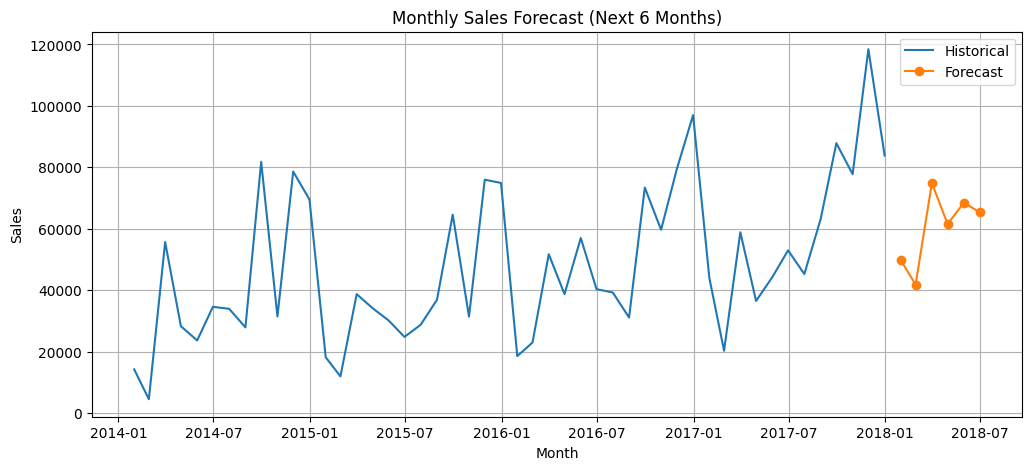

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, label='Historical')
plt.plot(forecast.index, forecast.values, label='Forecast', marker='o')
plt.title('Monthly Sales Forecast (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Save the cleaned dataset to CSV
df.to_csv("processed_sales_data.csv", index=False)

# Download it to your system
from google.colab import files
files.download("processed_sales_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>